In [1]:
%matplotlib inline
import geopandas as gpd
import shapely.affinity as affine
 
from weavingspace.weave_unit import WeaveUnit
from weavingspace.tile_map import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
nz = gpd.read_file("~/Documents/geodata/nz-2193.gpkg")
c = gpd.GeoDataFrame(crs = nz.crs,
    geometry = gpd.GeoSeries([affine.translate(
        nz.geometry.unary_union.centroid.buffer(8.5e5), -9e4, 8e4)]))
c2 = gpd.GeoDataFrame(crs = nz.crs,
    geometry = gpd.GeoSeries([affine.translate(
        nz.geometry.unary_union.centroid.buffer(5e5), -9e4, 8e4)]))
w1 = WeaveUnit(weave_type = "twill", n = 3, spacing = 2e4, aspect = .8,
               strands = "abc|def", crs = nz.crs).transform_rotate(20)
weave1 = Tiling(w1, c)

STEP 1: prep data (rotation if requested): 0.004
STEP A2: overlay zones with tiling: 0.202
STEP A3: calculate areas: 0.000
STEP A4: drop columns prior to join: 0.001
STEP A5: build lookup for join: 0.117
STEP A6: perform lookup join: 0.003


<Axes: >

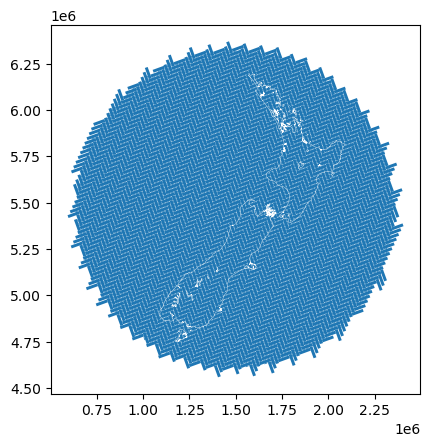

In [3]:
map = weave1.get_tiled_map(
    debug = True, 
    join_on_prototiles = False).map
p = map.plot(linewidth = 0)
nz.plot(ax = p, facecolor = "#00000000", edgecolor = "w", linewidth = 0.25)

In [4]:
# map.to_file("giscience.gpkg", mode = "w")


In [5]:
# c2.to_file("giscience-inner.gpkg", mode = "w")